In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import qgrid as qg

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [229]:
data = pd.read_csv('Happiness_2018.csv')

In [230]:
data

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
0,Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
1,Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
2,Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
3,Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Uzbekistan,6.1741,6.205460,0.825422,0.208660,0.745119,0.755703,0.800572,1.224960,0.969356,0.316903,0.380109
119,Venezuela,4.7066,5.005663,0.759221,0.373658,0.959502,0.805054,0.382224,1.156978,0.260700,-0.055972,0.437422
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
121,Zambia,4.1066,4.041488,0.702698,0.350963,0.577598,0.426378,0.610577,0.887901,0.606715,0.141879,0.448643


In [231]:
data.describe()

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,5.470357,5.548356,0.709738,0.292547,0.913063,0.740695,0.586485,1.022729,0.495120,0.088954,0.421973
std,1.123739,1.123935,0.111915,0.089541,0.382937,0.240660,0.126030,0.194304,0.201564,0.129183,0.046107
min,3.203300,2.694303,0.424125,0.092696,0.072922,0.000000,0.186768,0.470503,0.079710,-0.168192,0.274625
25%,4.541200,4.755255,0.640166,0.219076,0.609996,0.546475,0.515184,0.901457,0.331201,-0.008388,0.414347
50%,5.431800,5.536271,0.739387,0.282451,0.983121,0.805054,0.604694,1.069186,0.468837,0.081972,0.436202
75%,6.238250,6.295156,0.794049,0.358089,1.237519,0.916990,0.689079,1.184017,0.628473,0.169246,0.451122
max,7.768900,7.858107,0.883581,0.543836,1.608762,1.140899,0.800572,1.274715,0.988120,0.517895,0.478188


In [232]:
data[data.Healthy_Life_Exp==0]

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
104,Swaziland,4.2116,4.211565,0.824355,0.252339,0.810798,0.0,0.511659,0.964254,0.689549,-0.05298,0.413512


In [233]:
grid = qg.show_grid(data, show_toolbar=True)

In [234]:
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [235]:
data = grid.get_changed_df()

In [236]:
data

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
0,Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
1,Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
2,Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
3,Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Uzbekistan,6.1741,6.205460,0.825422,0.208660,0.745119,0.755703,0.800572,1.224960,0.969356,0.316903,0.380109
119,Venezuela,4.7066,5.005663,0.759221,0.373658,0.959502,0.805054,0.382224,1.156978,0.260700,-0.055972,0.437422
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
121,Zambia,4.1066,4.041488,0.702698,0.350963,0.577598,0.426378,0.610577,0.887901,0.606715,0.141879,0.448643


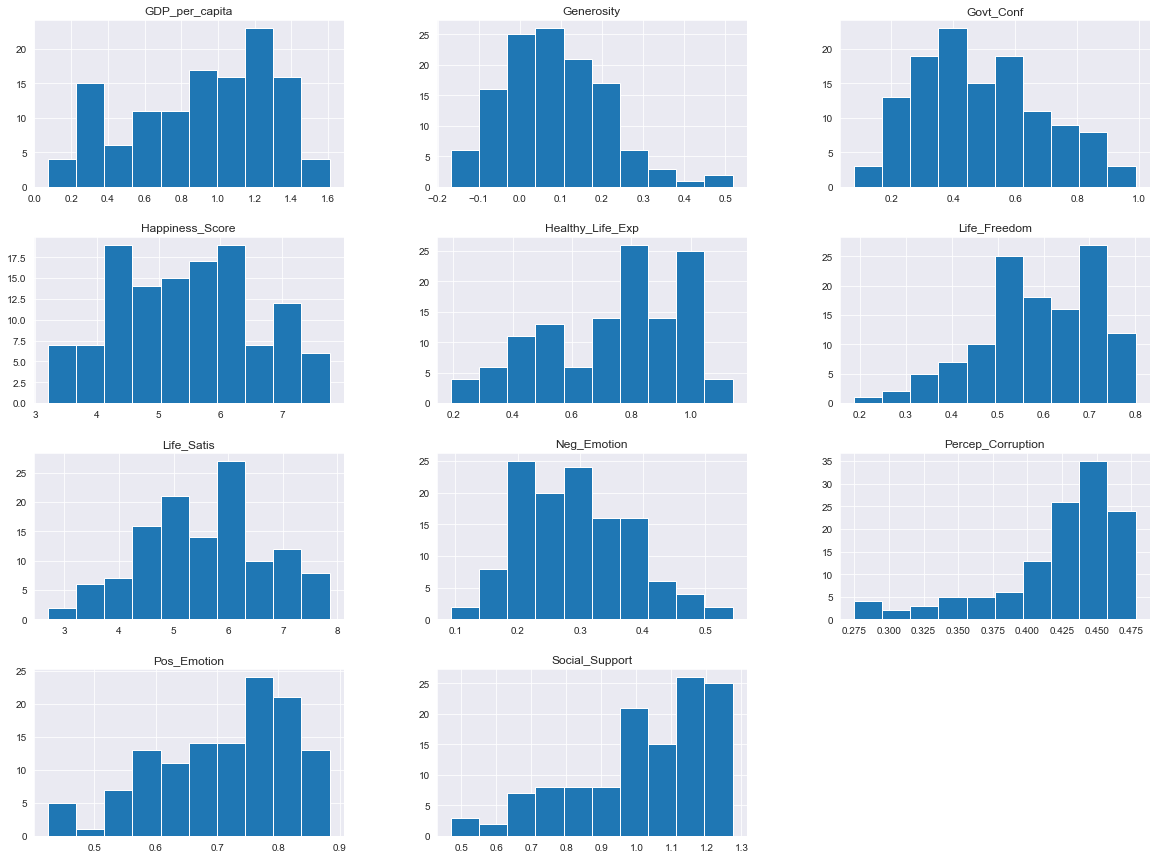

In [237]:
# distribution of each variable
hist = data.hist(figsize=[20,15])

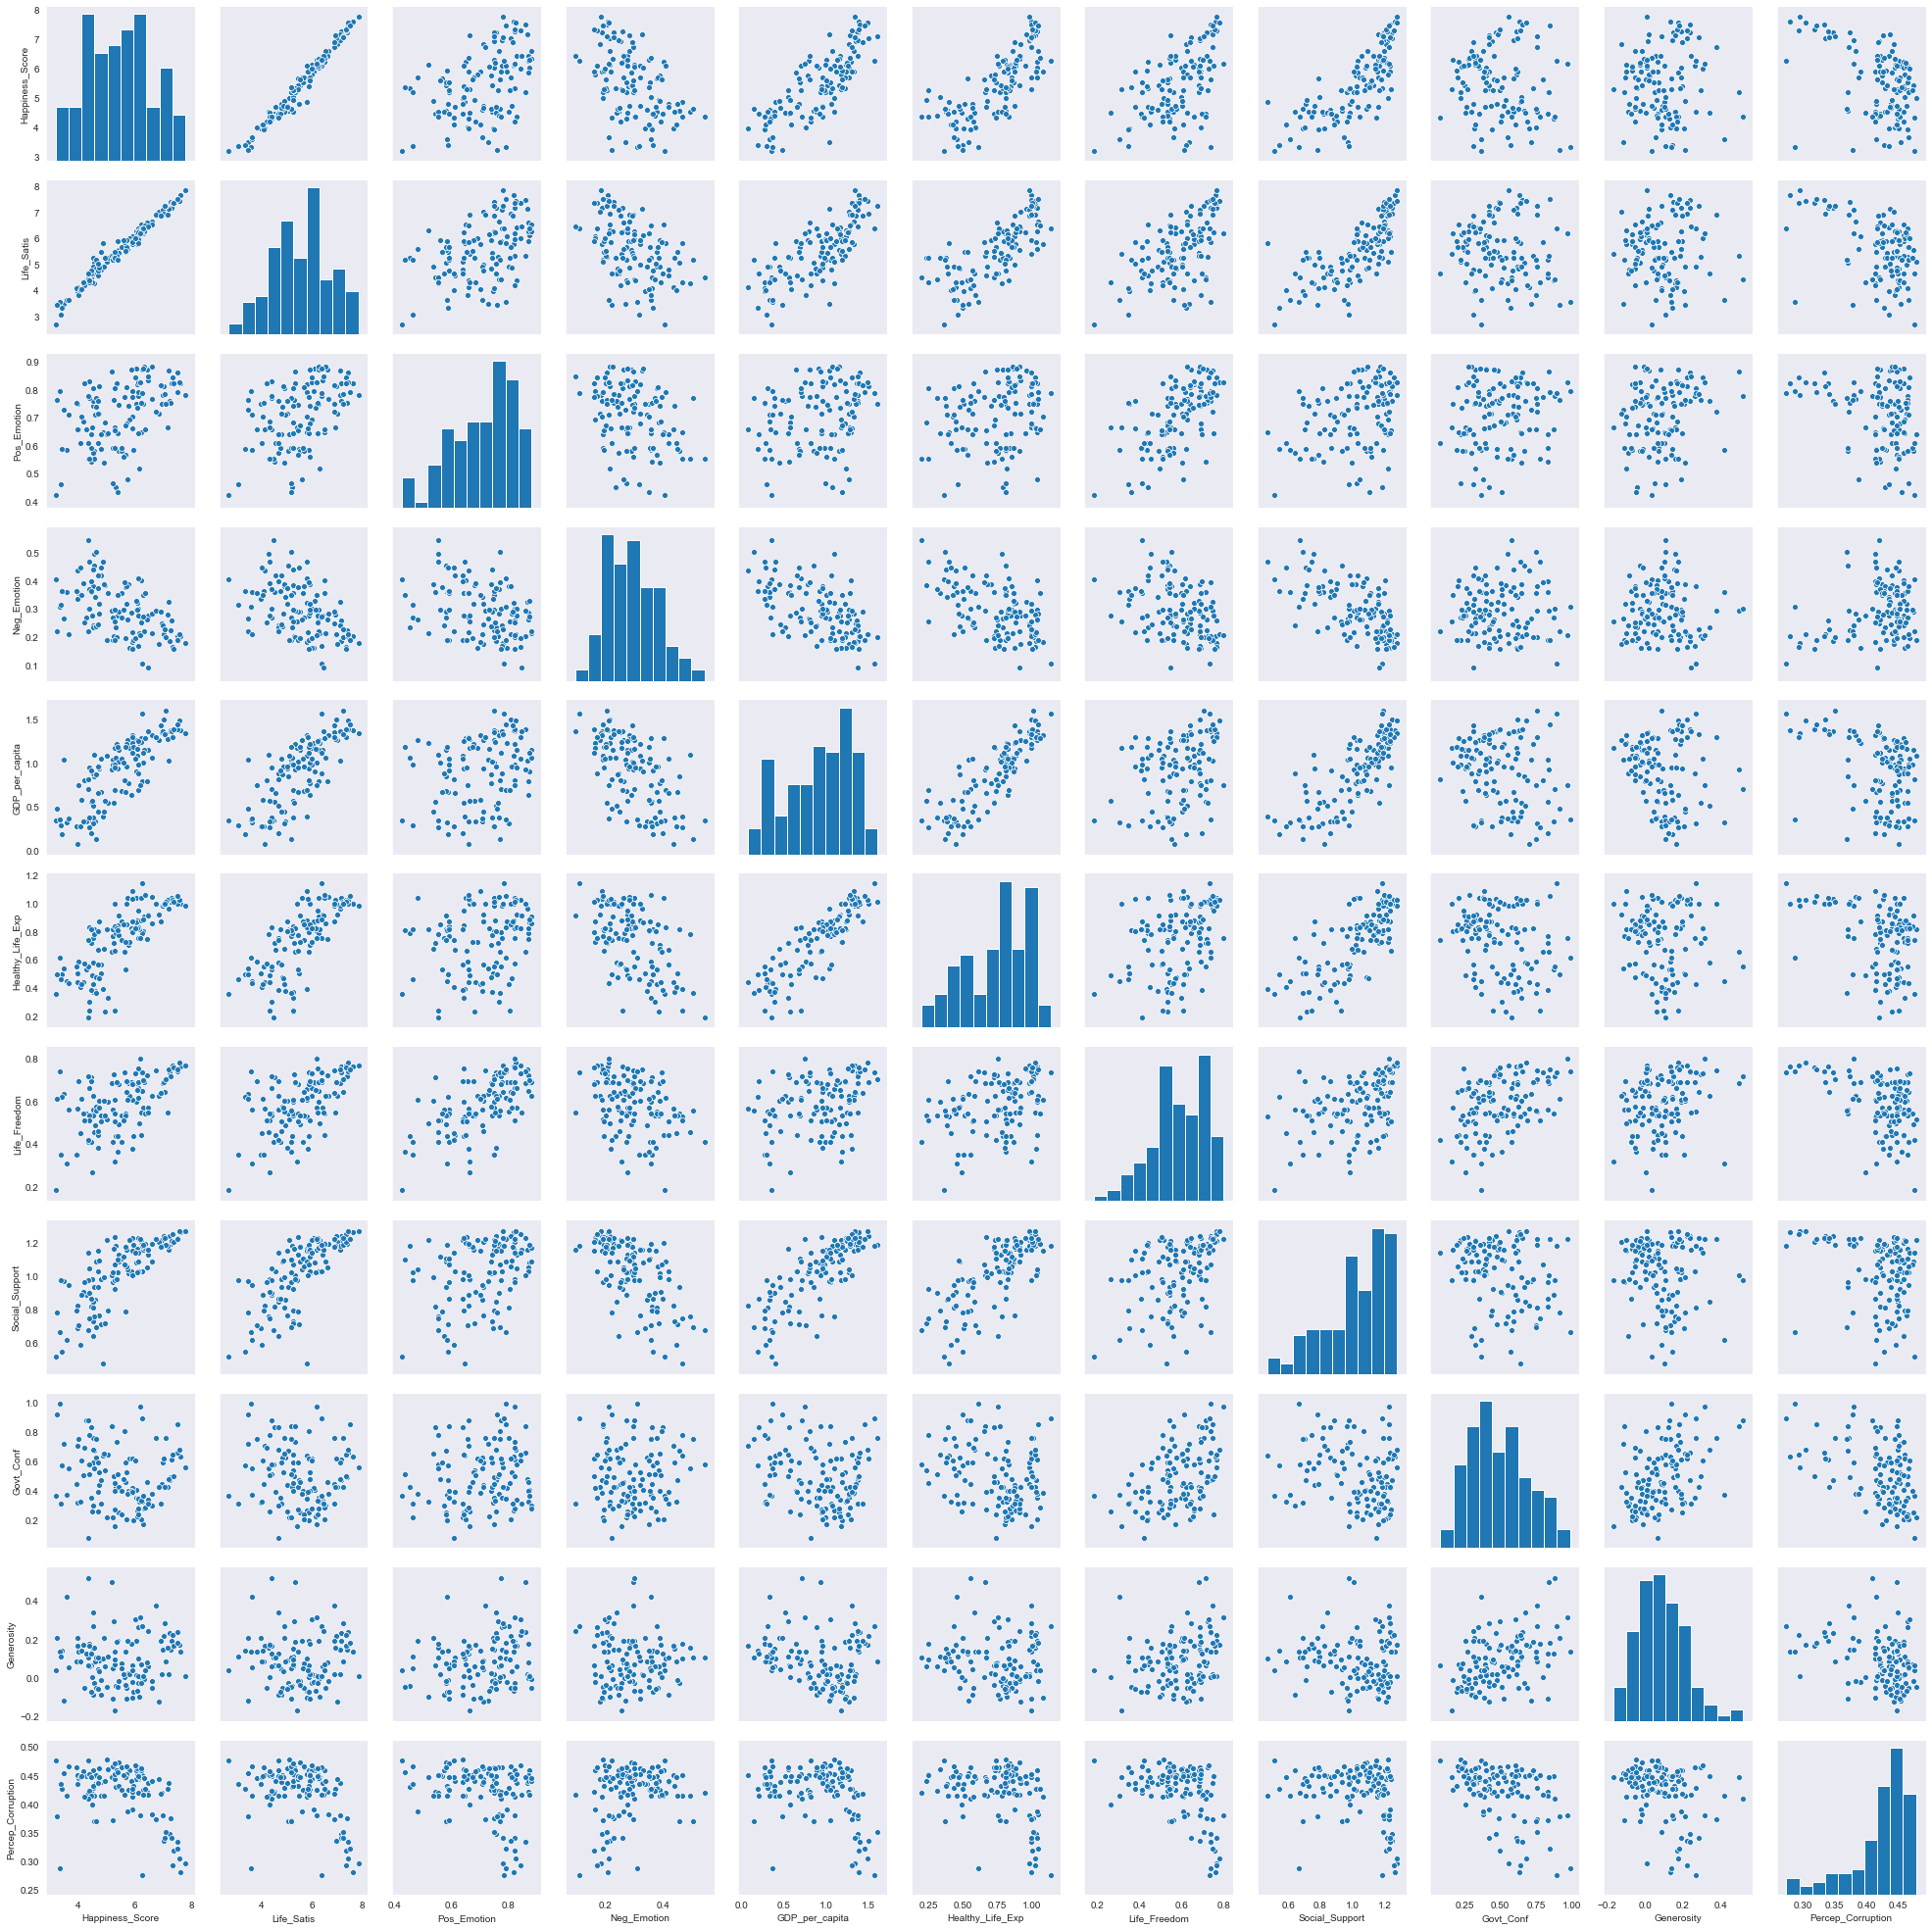

In [238]:
# correlations between variables
sns.set_style("dark")
sns.pairplot(data);

In [239]:
data.corr()

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
Happiness_Score,1.000000,0.983854,0.446021,-0.493679,0.802650,0.777554,0.540387,0.777050,-0.149961,0.011562,-0.448329
Life_Satis,0.983854,1.000000,0.458098,-0.460546,0.773622,0.749808,0.546879,0.742498,-0.124590,0.017697,-0.451507
Pos_Emotion,0.446021,0.458098,1.000000,-0.355279,0.254648,0.254255,0.633371,0.356454,0.160485,0.219824,-0.296681
Neg_Emotion,-0.493679,-0.460546,-0.355279,1.000000,-0.599368,-0.538596,-0.364153,-0.640798,0.028680,-0.039609,0.269091
GDP_per_capita,0.802650,0.773622,0.254648,-0.599368,1.000000,0.874303,0.364653,0.788579,-0.213036,-0.157579,-0.346213
Healthy_Life_Exp,0.777554,0.749808,0.254255,-0.538596,0.874303,1.000000,0.378899,0.752450,-0.250335,-0.084366,-0.352239
Life_Freedom,0.540387,0.546879,0.633371,-0.364153,0.364653,0.378899,1.000000,0.411774,0.434119,0.267116,-0.455496
Social_Support,0.777050,0.742498,0.356454,-0.640798,0.788579,0.752450,0.411774,1.000000,-0.223952,-0.102328,-0.254309
Govt_Conf,-0.149961,-0.124590,0.160485,0.028680,-0.213036,-0.250335,0.434119,-0.223952,1.000000,0.439623,-0.448697
Generosity,0.011562,0.017697,0.219824,-0.039609,-0.157579,-0.084366,0.267116,-0.102328,0.439623,1.000000,-0.283864


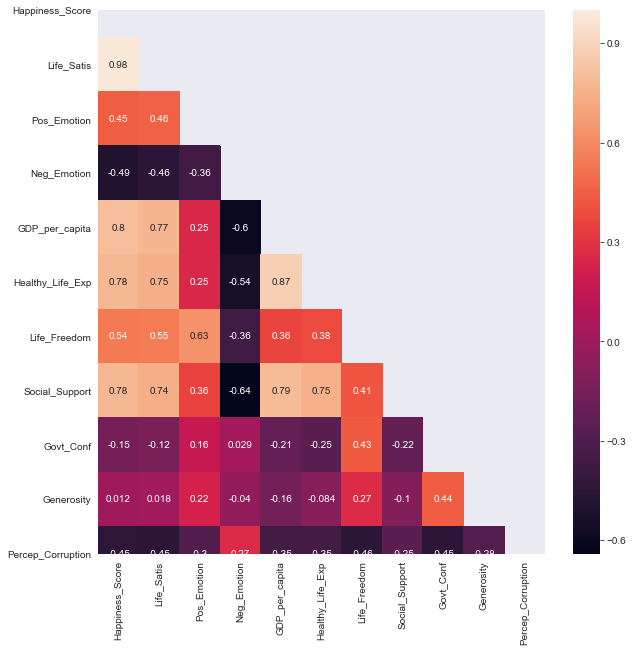

In [240]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data.corr(), mask=mask, annot=True);

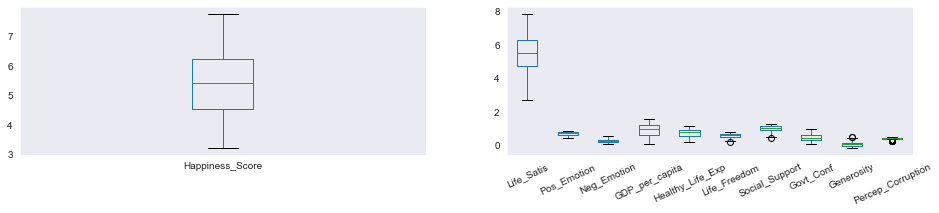

In [241]:
# looking to see if there are significant outliers
sns.set_style("darkgrid")

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1 = data.iloc[:,0:2].boxplot(grid=False, fontsize=10, ax=ax1)
ax2 = data.iloc[:,2:].boxplot(grid=False, rot=25, fontsize=10, ax=ax2)

In [242]:
happiest = data.sort_values('Happiness_Score', ascending=False).head(10)
happiest

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
34,Finland,7.7689,7.858107,0.781546,0.181781,1.340243,0.986145,0.766851,1.274715,0.555102,0.010487,0.295759
28,Denmark,7.6001,7.648786,0.821423,0.206053,1.383439,0.996019,0.763897,1.265407,0.632478,0.133956,0.280540
84,Norway,7.5539,7.444262,0.827414,0.211862,1.487767,1.028123,0.781964,1.273755,0.679503,0.173516,0.304542
78,Netherlands,7.4876,7.463097,0.861977,0.204794,1.396020,0.999314,0.738530,1.230673,0.656541,0.238988,0.334268
106,Switzerland,7.4802,7.508587,0.792226,0.191520,1.452245,1.051989,0.748964,1.228285,0.849979,0.179916,0.321938
105,Sweden,7.3433,7.374792,0.822676,0.160755,1.386577,1.009203,0.758073,1.208993,0.494396,0.168299,0.317999
79,New Zealand,7.3075,7.370286,0.845363,0.167951,1.302586,1.025635,0.767223,1.255548,0.642461,0.223296,0.293431
18,Canada,7.2781,7.175497,0.823669,0.259398,1.364896,1.038812,0.764867,1.213730,0.610467,0.191493,0.339889
5,Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305


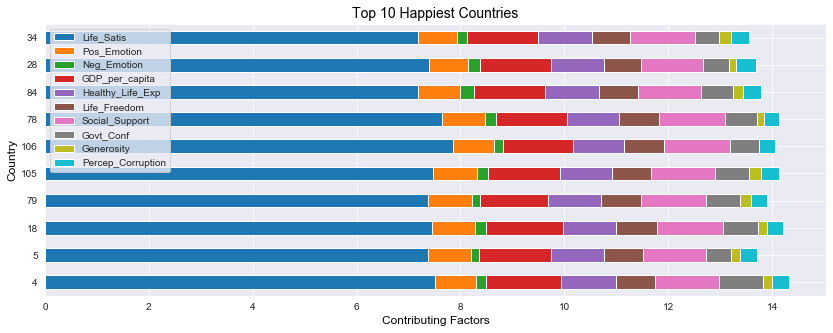

In [243]:
sns.set_style("darkgrid")
happiest.iloc[:,2:].sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=[14,5])

bars = list(reversed(happiest.index))
y_pos = np.arange(len(bars))
plt.yticks(y_pos,bars)

plt.xlabel("Contributing Factors",color="black",fontsize=12)
plt.ylabel("Country",color="black",fontsize=12)
plt.title("Top 10 Happiest Countries",color="black",fontsize=14)

plt.show()

In [244]:
unhappiest = data.sort_values('Happiness_Score', ascending=True).head(10)
unhappiest

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
0,Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
108,Tanzania,3.2307,3.445023,0.762089,0.221005,0.475854,0.498773,0.612146,0.780093,0.914648,0.209025,0.379350
93,Rwanda,3.3338,3.561047,0.793368,0.308199,0.359488,0.613996,0.739401,0.663610,0.988120,0.136881,0.287318
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
64,Malawi,3.4098,3.334634,0.586300,0.364894,0.190973,0.495386,0.621170,0.543990,0.572985,0.141578,0.427574
13,Botswana,3.4884,3.461366,0.729643,0.267084,1.040945,0.538402,0.636532,0.970127,0.718788,-0.117046,0.453491
43,Haiti,3.5969,3.614928,0.584113,0.358720,0.322931,0.449383,0.308661,0.613148,0.367897,0.420242,0.415342
122,Zimbabwe,3.6632,3.616480,0.710119,0.211726,0.365785,0.433069,0.561757,0.944692,0.550508,0.056339,0.466750
63,Madagascar,3.9327,4.070587,0.752341,0.362014,0.274076,0.554548,0.349633,0.790810,0.442306,0.087343,0.464829
22,Comoros,3.9728,3.972820,0.747742,0.337494,0.274484,0.505418,0.350912,0.689218,0.317274,0.205580,0.435928


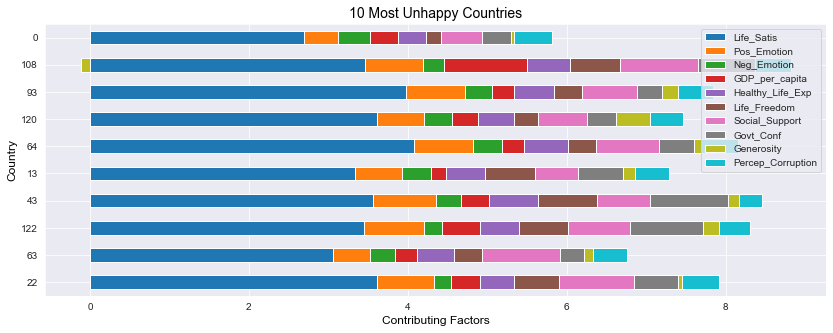

In [245]:
sns.set_style("darkgrid")
unhappiest.iloc[:,2:].sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=[14,5])

bars = list(reversed(unhappiest.index))
y_pos = np.arange(len(bars))
plt.yticks(y_pos,bars)

plt.xlabel("Contributing Factors",color="black",fontsize=12)
plt.ylabel("Country",color="black",fontsize=12)
plt.title("10 Most Unhappy Countries",color="black",fontsize=14)

plt.show()

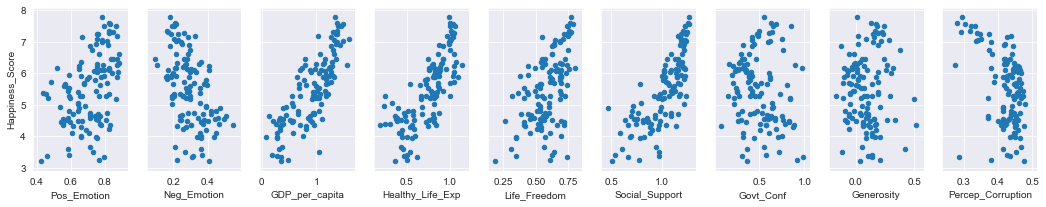

In [246]:
fig, axs = plt.subplots(1, 9, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]):
    data.plot(kind='scatter', x=j, y='Happiness_Score', ax=axs[i])

plt.show()
# strongest correlations are detected between Happiness Score and GDP, Health/life expectancy, and social support

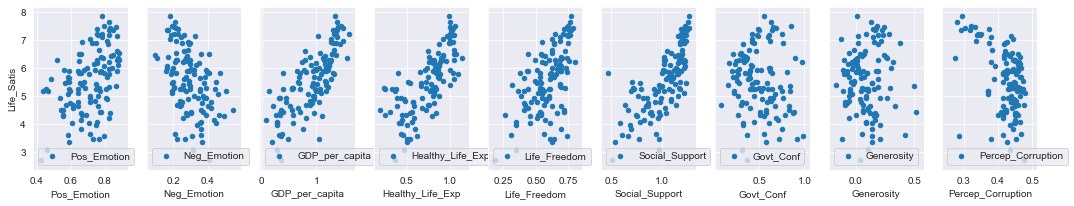

In [247]:
# do the same for life statisfaction
fig, axs = plt.subplots(1, 9, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Pos_Emotion', 'Neg_Emotion', 'GDP_per_capita', 'Healthy_Life_Exp', 'Life_Freedom', 'Social_Support', 'Govt_Conf','Generosity', 'Percep_Corruption' ]):
    data.plot(kind='scatter', x=j, y='Life_Satis', ax=axs[i], label=j)

plt.show()
# same observations for life satisfaction, although happiness score seems to be more correlated with these variables
# i will use happiness score as the target variable

In [248]:
# Define the target and predictors
outcome = 'Happiness_Score'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [249]:
x_cols.remove('country')

In [250]:
x_cols

['Life_Satis',
 'Pos_Emotion',
 'Neg_Emotion',
 'GDP_per_capita',
 'Healthy_Life_Exp',
 'Life_Freedom',
 'Social_Support',
 'Govt_Conf',
 'Generosity',
 'Percep_Corruption']

In [251]:
x_cols.remove('Life_Satis')

In [252]:
x_cols

['Pos_Emotion',
 'Neg_Emotion',
 'GDP_per_capita',
 'Healthy_Life_Exp',
 'Life_Freedom',
 'Social_Support',
 'Govt_Conf',
 'Generosity',
 'Percep_Corruption']

In [253]:
train, test = train_test_split(data)

In [254]:
print(len(train), len(test))
train.head()

92 31


,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
109,Thailand,6.0080,6.011562,0.843489,0.198190,1.049701,0.828101,0.730997,1.140938,0.605364,0.305311,0.467295
115,United Kingdom,7.0537,7.233445,0.783172,0.228276,1.332952,0.996018,0.643515,1.233034,0.420860,0.285122,0.340936
57,Latvia,5.9397,5.901154,0.585233,0.191871,1.186828,0.811610,0.436306,1.188992,0.197162,-0.071038,0.431406
47,Iran,4.5480,4.278118,0.553197,0.493149,1.099962,0.785339,0.454104,0.757914,0.549941,0.157267,0.414203
58,Lebanon,5.1973,5.167187,0.463881,0.270689,0.986887,0.814915,0.411398,1.026783,0.219075,0.049873,0.467011


In [255]:
test.head()

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
0,Afghanistan,3.2033,2.694303,0.424125,0.404904,0.349631,0.360616,0.186768,0.512260,0.364666,0.036632,0.476240
34,Finland,7.7689,7.858107,0.781546,0.181781,1.340243,0.986145,0.766851,1.274715,0.555102,0.010487,0.295759
55,Kosovo,6.1000,6.391826,0.778271,0.170248,0.882359,0.758264,0.689602,1.027427,0.347547,0.262008,0.464262
66,Mali,4.3904,4.415730,0.770017,0.369648,0.384862,0.307861,0.532259,0.898290,0.510795,0.060590,0.422516


In [256]:
# Fitting the training data
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     31.75
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           3.69e-23
Time:                        13:53:52   Log-Likelihood:                -68.812
No. Observations:                  92   AIC:                             157.6
Df Residuals:                      82   BIC:                             182.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7569      1.222      2.256      0.027       0.326       5.188
Pos_Emotion           0.3962      0.700      0.566      0.573      -0.995       1.788
Neg_Emotion           1.8869      0.842      2.240      0.028       0.211       3.562
GDP_per_capita        1.3072      0.355      3.683      0.000       0.601       2.013
Healthy_Life_Exp      0.0355      0.568      0.062      0.950      -1.095       1.166
Life_Freedom          2.3137      0.773      2.992      0.004       0.775       3.852
Social_Support        1.7391      0.529      3.290      0.001       0.687       2.791
Govt_Conf            -1.4448      0.469     -3.083      0.003      -2.377      -0.512
Generosity            0.8085      0.529      1.529      0.130      -0.243       1.860
Percep_Corruption    -4.3797      1.766     -2.481      0.015      -7.892      -0.867
==============================================================================
Omnibus:                        2.861   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.309
Skew:                          -0.375   Prob(JB):                        0.315
Kurtosis:                       3.196   Cond. No.                         82.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
predictors

'Pos_Emotion+Neg_Emotion+GDP_per_capita+Healthy_Life_Exp+Life_Freedom+Social_Support+Govt_Conf+Generosity+Percep_Corruption'

In [258]:
formula

'Happiness_Score~Pos_Emotion+Neg_Emotion+GDP_per_capita+Healthy_Life_Exp+Life_Freedom+Social_Support+Govt_Conf+Generosity+Percep_Corruption'

In [259]:
model

In [260]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     31.75
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           3.69e-23
Time:                        13:54:02   Log-Likelihood:                -68.812
No. Observations:                  92   AIC:                             157.6
Df Residuals:                      82   BIC:                             182.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7569      1.222      2.256      0.027       0.326       5.188
Pos_Emotion           0.3962      0.700      0.566      0.573      -0.995       1.788
Neg_Emotion           1.8869      0.842      2.240      0.028       0.211       3.562
GDP_per_capita        1.3072      0.355      3.683      0.000       0.601       2.013
Healthy_Life_Exp      0.0355      0.568      0.062      0.950      -1.095       1.166
Life_Freedom          2.3137      0.773      2.992      0.004       0.775       3.852
Social_Support        1.7391      0.529      3.290      0.001       0.687       2.791
Govt_Conf            -1.4448      0.469     -3.083      0.003      -2.377      -0.512
Generosity            0.8085      0.529      1.529      0.130      -0.243       1.860
Percep_Corruption    -4.3797      1.766     -2.481      0.015      -7.892      -0.867
==============================================================================
Omnibus:                        2.861   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.309
Skew:                          -0.375   Prob(JB):                        0.315
Kurtosis:                       3.196   Cond. No.                         82.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
# run a heat map here
data.corr()

,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
Happiness_Score,1.000000,0.983854,0.446021,-0.493679,0.802650,0.777554,0.540387,0.777050,-0.149961,0.011562,-0.448329
Life_Satis,0.983854,1.000000,0.458098,-0.460546,0.773622,0.749808,0.546879,0.742498,-0.124590,0.017697,-0.451507
Pos_Emotion,0.446021,0.458098,1.000000,-0.355279,0.254648,0.254255,0.633371,0.356454,0.160485,0.219824,-0.296681
Neg_Emotion,-0.493679,-0.460546,-0.355279,1.000000,-0.599368,-0.538596,-0.364153,-0.640798,0.028680,-0.039609,0.269091
GDP_per_capita,0.802650,0.773622,0.254648,-0.599368,1.000000,0.874303,0.364653,0.788579,-0.213036,-0.157579,-0.346213
Healthy_Life_Exp,0.777554,0.749808,0.254255,-0.538596,0.874303,1.000000,0.378899,0.752450,-0.250335,-0.084366,-0.352239
Life_Freedom,0.540387,0.546879,0.633371,-0.364153,0.364653,0.378899,1.000000,0.411774,0.434119,0.267116,-0.455496
Social_Support,0.777050,0.742498,0.356454,-0.640798,0.788579,0.752450,0.411774,1.000000,-0.223952,-0.102328,-0.254309
Govt_Conf,-0.149961,-0.124590,0.160485,0.028680,-0.213036,-0.250335,0.434119,-0.223952,1.000000,0.439623,-0.448697
Generosity,0.011562,0.017697,0.219824,-0.039609,-0.157579,-0.084366,0.267116,-0.102328,0.439623,1.000000,-0.283864


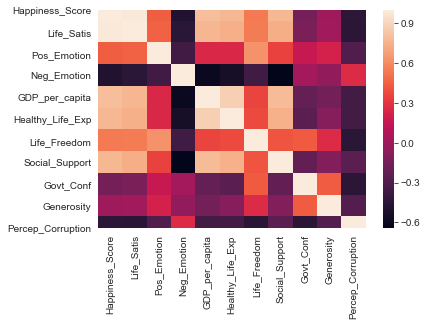

In [262]:
heat_map = sns.heatmap(data.corr())

In [263]:
# Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

10 6
['Neg_Emotion', 'GDP_per_capita', 'Life_Freedom', 'Social_Support', 'Govt_Conf']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.7569,1.222,2.256,0.027,0.326,5.188
Pos_Emotion,0.3962,0.700,0.566,0.573,-0.995,1.788
Neg_Emotion,1.8869,0.842,2.240,0.028,0.211,3.562
GDP_per_capita,1.3072,0.355,3.683,0.000,0.601,2.013
Healthy_Life_Exp,0.0355,0.568,0.062,0.950,-1.095,1.166


In [264]:
x_cols

['Neg_Emotion',
 'GDP_per_capita',
 'Life_Freedom',
 'Social_Support',
 'Govt_Conf',
 'Percep_Corruption']

In [265]:
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.7569,1.222,2.256,0.027,0.326,5.188
Pos_Emotion,0.3962,0.700,0.566,0.573,-0.995,1.788
Neg_Emotion,1.8869,0.842,2.240,0.028,0.211,3.562
GDP_per_capita,1.3072,0.355,3.683,0.000,0.601,2.013
Healthy_Life_Exp,0.0355,0.568,0.062,0.950,-1.095,1.166
Life_Freedom,2.3137,0.773,2.992,0.004,0.775,3.852
Social_Support,1.7391,0.529,3.290,0.001,0.687,2.791
Govt_Conf,-1.4448,0.469,-3.083,0.003,-2.377,-0.512
Generosity,0.8085,0.529,1.529,0.130,-0.243,1.860


In [266]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     47.13
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           5.32e-25
Time:                        13:54:22   Log-Likelihood:                -70.458
No. Observations:                  92   AIC:                             154.9
Df Residuals:                      85   BIC:                             172.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.4376      1.044      3.293      0.001       1.362       5.513
Neg_Emotion           1.6460      0.826      1.994      0.049       0.005       3.288
GDP_per_capita        1.1729      0.267      4.389      0.000       0.642       1.704
Life_Freedom          2.5989      0.647      4.017      0.000       1.313       3.885
Social_Support        1.8188      0.518      3.512      0.001       0.789       2.848
Govt_Conf            -1.4240      0.422     -3.372      0.001      -2.264      -0.584
Percep_Corruption    -5.2601      1.634     -3.218      0.002      -8.510      -2.011
==============================================================================
Omnibus:                        3.704   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.030
Skew:                          -0.415   Prob(JB):                        0.220
Kurtosis:                       3.320   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 6
['Neg_Emotion', 'GDP_per_capita', 'Life_Freedom', 'Social_Support', 'Govt_Conf']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.4376,1.044,3.293,0.001,1.362,5.513
Neg_Emotion,1.6460,0.826,1.994,0.049,0.005,3.288
GDP_per_capita,1.1729,0.267,4.389,0.000,0.642,1.704
Life_Freedom,2.5989,0.647,4.017,0.000,1.313,3.885
Social_Support,1.8188,0.518,3.512,0.001,0.789,2.848


In [268]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     47.13
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           5.32e-25
Time:                        13:54:32   Log-Likelihood:                -70.458
No. Observations:                  92   AIC:                             154.9
Df Residuals:                      85   BIC:                             172.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.4376      1.044      3.293      0.001       1.362       5.513
Neg_Emotion           1.6460      0.826      1.994      0.049       0.005       3.288
GDP_per_capita        1.1729      0.267      4.389      0.000       0.642       1.704
Life_Freedom          2.5989      0.647      4.017      0.000       1.313       3.885
Social_Support        1.8188      0.518      3.512      0.001       0.789       2.848
Govt_Conf            -1.4240      0.422     -3.372      0.001      -2.264      -0.584
Percep_Corruption    -5.2601      1.634     -3.218      0.002      -8.510      -2.011
==============================================================================
Omnibus:                        3.704   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.030
Skew:                          -0.415   Prob(JB):                        0.220
Kurtosis:                       3.320   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
# Code a way to identify multicollinearity
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Neg_Emotion', 16.67756392234983),
 ('GDP_per_capita', 20.138532207313972),
 ('Life_Freedom', 42.706446436079915),
 ('Social_Support', 80.83380003916113),
 ('Govt_Conf', 10.956867185121919),
 ('Percep_Corruption', 52.10131682727609)]

In [270]:
# Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 43]
print(len(vif_scores), len(x_cols))

6 4


In [271]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     53.95
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           8.78e-23
Time:                        13:55:14   Log-Likelihood:                -80.470
No. Observations:                  92   AIC:                             170.9
Df Residuals:                      87   BIC:                             183.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1273      0.544      3.910      0.000       1.046       3.209
Neg_Emotion        0.7532      0.870      0.866      0.389      -0.976       2.483
GDP_per_capita     1.9220      0.227      8.456      0.000       1.470       2.374
Life_Freedom       3.2359      0.689      4.694      0.000       1.866       4.606
Govt_Conf         -1.1273      0.404     -2.789      0.006      -1.931      -0.324
==============================================================================
Omnibus:                        7.934   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.469
Skew:                          -0.651   Prob(JB):                       0.0239
Kurtosis:                       3.504   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

5 3
['GDP_per_capita', 'Life_Freedom', 'Govt_Conf']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.1273,0.544,3.910,0.000,1.046,3.209
Neg_Emotion,0.7532,0.870,0.866,0.389,-0.976,2.483
GDP_per_capita,1.9220,0.227,8.456,0.000,1.470,2.374
Life_Freedom,3.2359,0.689,4.694,0.000,1.866,4.606
Govt_Conf,-1.1273,0.404,-2.789,0.006,-1.931,-0.324


In [273]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        13:55:28   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        13:55:31   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

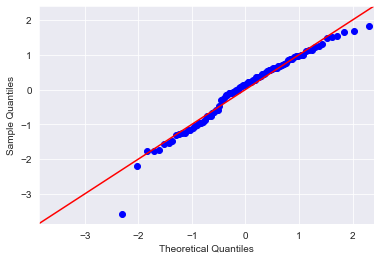

In [275]:
# Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

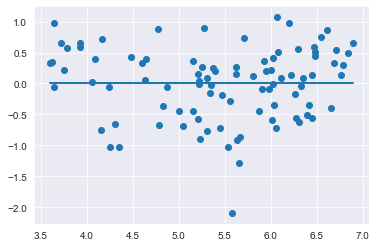

In [276]:
# Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

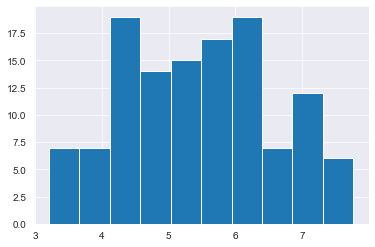

In [277]:
# Check for outliers
data.Happiness_Score.hist()

In [278]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Happiness_Score.quantile(q=q)))

0.8 percentile: 6.403360176086429
0.81 percentile: 6.442595834732058
0.82 percentile: 6.452035903930666
0.83 percentile: 6.5927241230011
0.84 percentile: 6.657427921295165
0.85 percentile: 6.814149856567381
0.86 percentile: 6.889084110260012
0.87 percentile: 6.931679897308348
0.88 percentile: 6.997996101379393
0.89 percentile: 7.040008001327516
0.9 percentile: 7.082980060577393
0.91 percentile: 7.139274005889889
0.92 percentile: 7.181943950653073
0.93 percentile: 7.2362800025939915
0.94 percentile: 7.267827949523925
0.95 percentile: 7.304559898376462
0.96 percentile: 7.359727859497071
0.97 percentile: 7.4827158260345445
0.98 percentile: 7.524727802276614
0.99 percentile: 7.58993597984314


In [279]:
for i in range(0,10):
    q = i/100
    print("{} percentile: {}".format(q, data.Happiness_Score.quantile(q=q)))

0.0 percentile: 3.20329999923706
0.01 percentile: 3.253382029533386
0.02 percentile: 3.3540400791168183
0.03 percentile: 3.3996000623702978
0.04 percentile: 3.478967990875242
0.05 percentile: 3.6035299777984617
0.06 percentile: 3.749439907073975
0.07 percentile: 3.954353971481325
0.08 percentile: 3.9747000598907496
0.09 percentile: 4.014402136802673


In [280]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Happiness_Score < 7.55] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.024390243902439025


In [281]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Happiness_Score > 3.25] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.016666666666666666


In [282]:
# orig_tot = len(data)
# # need to edit code to match numbers
# data = data[data.Happiness_Score > 0] # Subsetting to remove extreme outliers

# print('Percent removed:', (orig_tot -len(data))/orig_tot)

# # data.Score = data.Score.map(np.log) # Applying a log transformation
# # train, test = train_test_split(data)

In [283]:
data

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
1,Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
2,Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
3,Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
5,Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Uzbekistan,6.1741,6.205460,0.825422,0.208660,0.745119,0.755703,0.800572,1.224960,0.969356,0.316903,0.380109
119,Venezuela,4.7066,5.005663,0.759221,0.373658,0.959502,0.805054,0.382224,1.156978,0.260700,-0.055972,0.437422
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
121,Zambia,4.1066,4.041488,0.702698,0.350963,0.577598,0.426378,0.610577,0.887901,0.606715,0.141879,0.448643


In [284]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        13:57:32   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

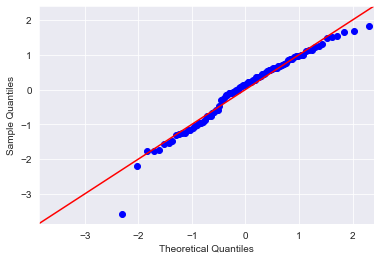

In [285]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [286]:
data.Happiness_Score.sort_values()

93     3.3338
120    3.3798
64     3.4098
13     3.4884
43     3.5969
        ...  
18     7.2781
79     7.3075
105    7.3433
106    7.4802
78     7.4876
Name: Happiness_Score, Length: 118, dtype: float64

In [287]:
data

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
1,Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
2,Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
3,Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
5,Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Uzbekistan,6.1741,6.205460,0.825422,0.208660,0.745119,0.755703,0.800572,1.224960,0.969356,0.316903,0.380109
119,Venezuela,4.7066,5.005663,0.759221,0.373658,0.959502,0.805054,0.382224,1.156978,0.260700,-0.055972,0.437422
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
121,Zambia,4.1066,4.041488,0.702698,0.350963,0.577598,0.426378,0.610577,0.887901,0.606715,0.141879,0.448643


In [185]:
# orig_tot = len(data)
# # need to edit code to match numbers
# data = data[data.Happiness_Score > 0] # Subsetting to remove extreme outliers

# print('Percent removed:', (orig_tot -len(data))/orig_tot)

# # data.Score = data.Score.map(np.log) # Applying a log transformation
# # train, test = train_test_split(data)

Percent removed: 0.0


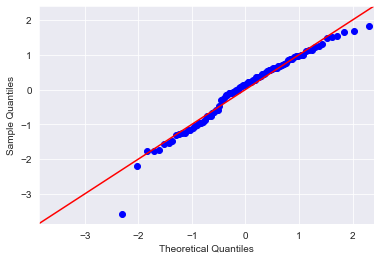

In [288]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [291]:
data.Happiness_Score.min()

3.3338000774383505

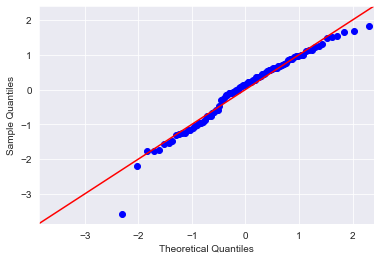

In [292]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

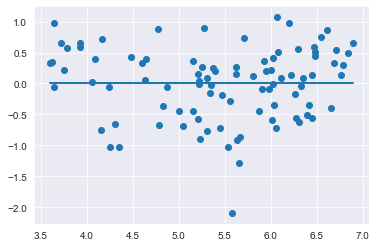

In [293]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 6.3126999855041515
0.81 percentile: 6.346556181907657
0.82 percentile: 6.431274147033694
0.83 percentile: 6.444241781234744
0.84 percentile: 6.487051963806156
0.85 percentile: 6.593180108070373
0.86 percentile: 6.675781879425051
0.87 percentile: 6.8255348682403545
0.88 percentile: 6.890692119598391
0.89 percentile: 6.931059894561766
0.9 percentile: 6.995830106735228
0.91 percentile: 7.03642200946808
0.92 percentile: 7.077124042510986
0.93 percentile: 7.1295040225982635
0.94 percentile: 7.166825885772702
0.95 percentile: 7.230700111389157
0.96 percentile: 7.256271877288816
0.97 percentile: 7.292505950927733
0.98 percentile: 7.331127872467042
0.99 percentile: 7.456926822662352


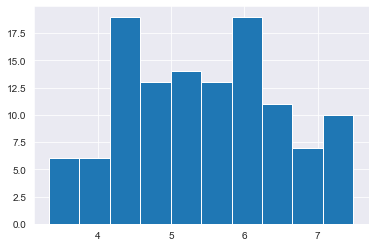

In [295]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Happiness_Score.quantile(q=q)))

data.Happiness_Score.hist()

In [297]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Happiness_Score < 7.45] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.01694915254237288


In [302]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Happiness_Score > 3.3338000774383505] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.008620689655172414


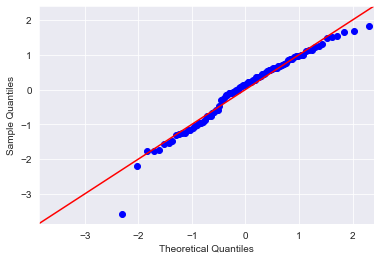

In [303]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [304]:
data.Happiness_Score.min()

3.37980008125305

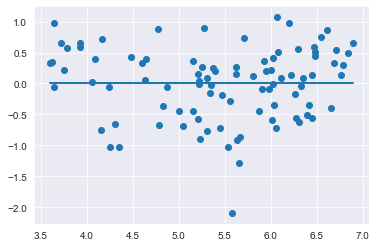

In [305]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

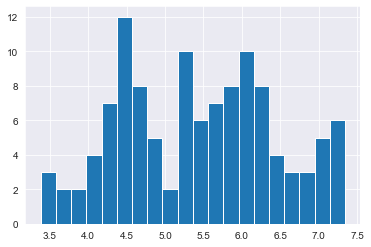

In [307]:
data.Happiness_Score.hist(bins=20)

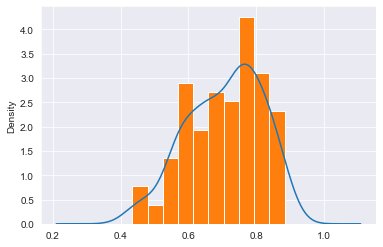

In [322]:
data.Pos_Emotion.plot.kde()
data.Pos_Emotion.hist(normed=True, label= column+' histogram')


In [327]:
x_cols

['GDP_per_capita', 'Life_Freedom', 'Govt_Conf']

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


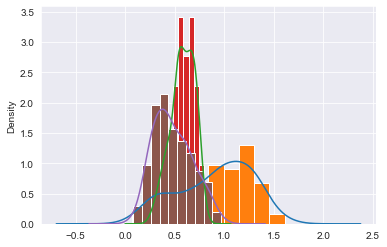

In [328]:
data.GDP_per_capita.plot.kde()
data.GDP_per_capita.hist(normed=True, label= column+' histogram')

data.Life_Freedom.plot.kde()
data.Life_Freedom.hist(normed=True, label= column+' histogram')

data.Govt_Conf.plot.kde()
data.Govt_Conf.hist(normed=True, label= column+' histogram')

In [329]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        14:15:35   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
data

,country,Happiness_Score,Life_Satis,Pos_Emotion,Neg_Emotion,GDP_per_capita,Healthy_Life_Exp,Life_Freedom,Social_Support,Govt_Conf,Generosity,Percep_Corruption
1,Albania,4.7186,5.004403,0.713300,0.318997,0.947101,0.874208,0.603776,0.765636,0.435338,0.091772,0.463107
2,Argentina,6.0863,5.792797,0.820310,0.320502,1.091516,0.880779,0.658266,1.165710,0.261352,-0.070508,0.452476
3,Armenia,4.5594,5.062449,0.581488,0.454840,0.850109,0.814928,0.545134,0.934694,0.670828,-0.027038,0.370311
4,Australia,7.2280,7.176993,0.759019,0.187456,1.371545,1.035532,0.736600,1.244047,0.468837,0.234672,0.347305
5,Austria,7.2460,7.396002,0.752350,0.226059,1.375542,1.015777,0.718093,1.193445,0.488679,0.147560,0.374641
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Uzbekistan,6.1741,6.205460,0.825422,0.208660,0.745119,0.755703,0.800572,1.224960,0.969356,0.316903,0.380109
119,Venezuela,4.7066,5.005663,0.759221,0.373658,0.959502,0.805054,0.382224,1.156978,0.260700,-0.055972,0.437422
120,Yemen,3.3798,3.057514,0.461114,0.314870,0.286911,0.462540,0.347898,0.976045,0.308151,0.108465,0.434966
121,Zambia,4.1066,4.041488,0.702698,0.350963,0.577598,0.426378,0.610577,0.887901,0.606715,0.141879,0.448643


In [332]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        14:16:20   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

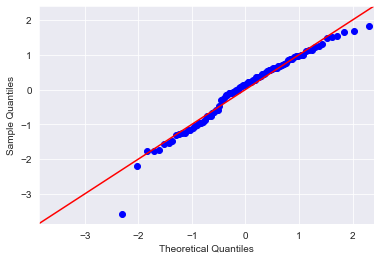

In [333]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

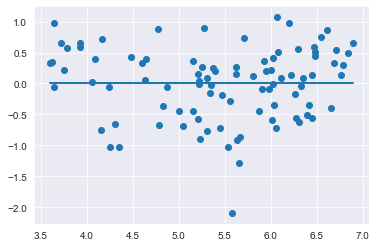

In [334]:
# Check the Homoscedasticity Assumption

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [335]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

4 3
['GDP_per_capita', 'Life_Freedom', 'Govt_Conf']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.5126,0.312,8.044,0.000,1.892,3.133
GDP_per_capita,1.8182,0.193,9.430,0.000,1.435,2.201
Life_Freedom,3.1322,0.678,4.620,0.000,1.785,4.480
Govt_Conf,-1.1384,0.403,-2.822,0.006,-1.940,-0.337


In [336]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     71.89
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.37e-23
Time:                        14:16:35   Log-Likelihood:                -80.864
No. Observations:                  92   AIC:                             169.7
Df Residuals:                      88   BIC:                             179.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5126      0.312      8.044      0.000       1.892       3.133
GDP_per_capita     1.8182      0.193      9.430      0.000       1.435       2.201
Life_Freedom       3.1322      0.678      4.620      0.000       1.785       4.480
Govt_Conf         -1.1384      0.403     -2.822      0.006      -1.940      -0.337
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.079
Skew:                          -0.632   Prob(JB):                       0.0290
Kurtosis:                       3.498   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
need to run the same things for the test data

In [349]:
# Define the target and predictors
outcome = 'Happiness_Score'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [350]:
x_cols

['country',
 'Life_Satis',
 'Pos_Emotion',
 'Neg_Emotion',
 'GDP_per_capita',
 'Healthy_Life_Exp',
 'Life_Freedom',
 'Social_Support',
 'Govt_Conf',
 'Generosity',
 'Percep_Corruption']

In [351]:
x_cols.remove('country')

In [352]:
x_cols.remove('Life_Satis')

In [353]:
x_cols

['Pos_Emotion',
 'Neg_Emotion',
 'GDP_per_capita',
 'Healthy_Life_Exp',
 'Life_Freedom',
 'Social_Support',
 'Govt_Conf',
 'Generosity',
 'Percep_Corruption']

In [354]:
# Fitting the testing data

# need to start over with the original set of x_cols and start the (refining) process over

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     32.67
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.26e-10
Time:                        14:20:02   Log-Likelihood:                -8.1525
No. Observations:                  31   AIC:                             36.31
Df Residuals:                      21   BIC:                             50.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.4997      1.719      3.199      0.004       1.925       9.075
Pos_Emotion           2.1940      0.875      2.507      0.020       0.374       4.014
Neg_Emotion          -0.5050      1.365     -0.370      0.715      -3.344       2.334
GDP_per_capita        0.4758      0.440      1.080      0.292      -0.440       1.392
Healthy_Life_Exp      0.9973      0.651      1.531      0.141      -0.357       2.352
Life_Freedom          2.2138      1.011      2.190      0.040       0.112       4.316
Social_Support        0.4474      0.831      0.539      0.596      -1.280       2.175
Govt_Conf            -1.4379      0.549     -2.620      0.016      -2.579      -0.296
Generosity            0.4748      0.642      0.740      0.468      -0.860       1.810
Percep_Corruption    -8.8445      2.104     -4.203      0.000     -13.221      -4.468
==============================================================================
Omnibus:                        1.969   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.432
Skew:                          -0.525   Prob(JB):                        0.489
Kurtosis:                       2.923   Cond. No.                         87.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
# Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

10 4
['Pos_Emotion', 'Life_Freedom', 'Govt_Conf', 'Percep_Corruption']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,5.4997,1.719,3.199,0.004,1.925,9.075
Pos_Emotion,2.1940,0.875,2.507,0.020,0.374,4.014
Neg_Emotion,-0.5050,1.365,-0.370,0.715,-3.344,2.334
GDP_per_capita,0.4758,0.440,1.080,0.292,-0.440,1.392
Healthy_Life_Exp,0.9973,0.651,1.531,0.141,-0.357,2.352


In [356]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     44.38
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.98e-11
Time:                        14:20:13   Log-Likelihood:                -18.233
No. Observations:                  31   AIC:                             46.47
Df Residuals:                      26   BIC:                             53.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.1127      1.269      6.394      0.000       5.505      10.721
Pos_Emotion           1.9821      1.078      1.839      0.077      -0.234       4.198
Life_Freedom          4.4104      1.023      4.313      0.000       2.308       6.512
Govt_Conf            -2.4676      0.469     -5.256      0.000      -3.433      -1.503
Percep_Corruption   -13.0270      2.112     -6.168      0.000     -17.369      -8.685
==============================================================================
Omnibus:                        0.327   Durbin-Watson:                   2.663
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.496
Skew:                          -0.167   Prob(JB):                        0.781
Kurtosis:                       2.479   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

5 3
['Life_Freedom', 'Govt_Conf', 'Percep_Corruption']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.1127,1.269,6.394,0.000,5.505,10.721
Pos_Emotion,1.9821,1.078,1.839,0.077,-0.234,4.198
Life_Freedom,4.4104,1.023,4.313,0.000,2.308,6.512
Govt_Conf,-2.4676,0.469,-5.256,0.000,-3.433,-1.503
Percep_Corruption,-13.0270,2.112,-6.168,0.000,-17.369,-8.685


In [358]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     53.35
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.78e-11
Time:                        14:20:23   Log-Likelihood:                -20.128
No. Observations:                  31   AIC:                             48.26
Df Residuals:                      27   BIC:                             53.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.5820      1.297      6.619      0.000       5.922      11.242
Life_Freedom          5.6846      0.784      7.247      0.000       4.075       7.294
Govt_Conf            -2.5108      0.489     -5.133      0.000      -3.514      -1.507
Percep_Corruption   -12.4663      2.180     -5.718      0.000     -16.940      -7.993
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.701
Skew:                          -0.568   Prob(JB):                        0.427
Kurtosis:                       2.832   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
# Code a way to identify multicollinearity
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Life_Freedom', 24.169514821293394),
 ('Govt_Conf', 8.446652989740286),
 ('Percep_Corruption', 17.04819872794255)]

In [360]:
# Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 25]
print(len(vif_scores), len(x_cols))

3 3


In [361]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     34.44
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           8.08e-15
Time:                        14:20:34   Log-Likelihood:                -102.12
No. Observations:                  92   AIC:                             212.2
Df Residuals:                      88   BIC:                             222.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.4077      1.131      7.431      0.000       6.159      10.656
Life_Freedom          5.3513      0.767      6.976      0.000       3.827       6.876
Govt_Conf            -3.6871      0.473     -7.787      0.000      -4.628      -2.746
Percep_Corruption   -10.0409      2.073     -4.844      0.000     -14.160      -5.922
==============================================================================
Omnibus:                        4.713   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.994
Skew:                          -0.440   Prob(JB):                        0.136
Kurtosis:                       3.518   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

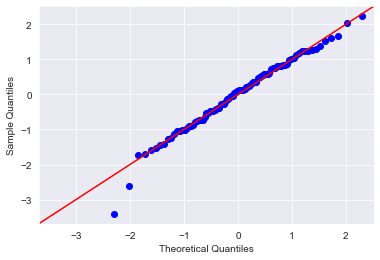

In [362]:
# Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

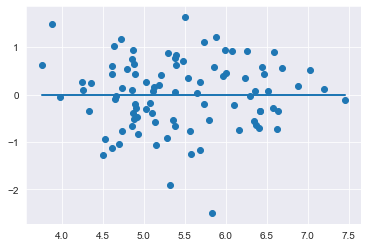

In [363]:
# Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

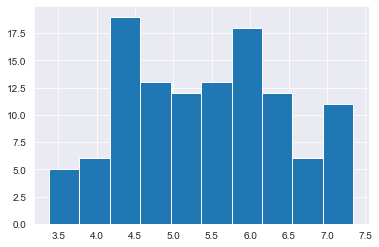

In [365]:
# Check for outliers
data.Happiness_Score.hist()

In [368]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Happiness_Score.quantile(q=q)))

0.8 percentile: 6.294600105285644
0.81 percentile: 6.307109956741336
0.82 percentile: 6.337044124603273
0.83 percentile: 6.405002174377444
0.84 percentile: 6.442127857208255
0.85 percentile: 6.445979881286625
0.86 percentile: 6.5921961402893094
0.87 percentile: 6.618098011016842
0.88 percentile: 6.766079807281496
0.89 percentile: 6.870592002868651
0.9 percentile: 6.910719966888428
0.91 percentile: 6.96888006210327
0.92 percentile: 7.016768054962161
0.93 percentile: 7.054431972503662
0.94 percentile: 7.098044071197509
0.95 percentile: 7.1473099708557095
0.96 percentile: 7.194064006805418
0.97 percentile: 7.238439960479733
0.98 percentile: 7.269111957550048
0.99 percentile: 7.303383903503416


In [370]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Happiness_Score < 7.303383903503416] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.list_price = data.list_price.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.017391304347826087


In [371]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     53.35
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.78e-11
Time:                        14:22:12   Log-Likelihood:                -20.128
No. Observations:                  31   AIC:                             48.26
Df Residuals:                      27   BIC:                             53.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.5820      1.297      6.619      0.000       5.922      11.242
Life_Freedom          5.6846      0.784      7.247      0.000       4.075       7.294
Govt_Conf            -2.5108      0.489     -5.133      0.000      -3.514      -1.507
Percep_Corruption   -12.4663      2.180     -5.718      0.000     -16.940      -7.993
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.701
Skew:                          -0.568   Prob(JB):                        0.427
Kurtosis:                       2.832   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

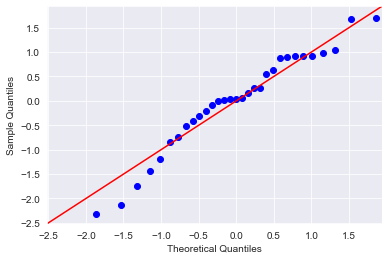

In [372]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

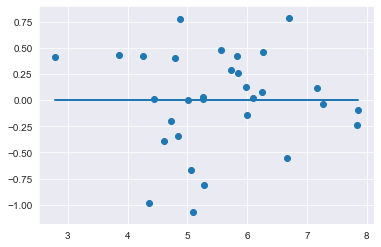

In [377]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(test[x_cols]), model.resid)
plt.plot(model.predict(test[x_cols]), [0 for i in range(len(test))])

0.8 percentile: 6.258440017700197
0.81 percentile: 6.2845361328125
0.82 percentile: 6.2987599563598655
0.83 percentile: 6.3204400253295905
0.84 percentile: 6.360668220520022
0.85 percentile: 6.437760066986087
0.86 percentile: 6.444703807830813
0.87 percentile: 6.510396003723147
0.88 percentile: 6.593444099426269
0.89 percentile: 6.683647861480715
0.9 percentile: 6.82679986953735
0.91 percentile: 6.889084110260012
0.92 percentile: 6.925479869842528
0.93 percentile: 6.9907761192321765
0.94 percentile: 7.030228023529054
0.95 percentile: 7.068340015411376
0.96 percentile: 7.115468044281004
0.97 percentile: 7.157067928314206
0.98 percentile: 7.213456096649167
0.99 percentile: 7.243839855194088


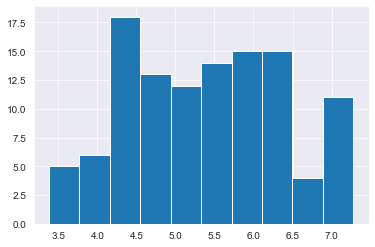

In [379]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Happiness_Score.quantile(q=q)))

data.Happiness_Score.hist()

In [381]:
# need to edit this code
data = data[data.Happiness_Score <= 7.243839855194088]
train, test = train_test_split(data)

In [382]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     37.10
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           4.59e-15
Time:                        14:24:32   Log-Likelihood:                -81.976
No. Observations:                  83   AIC:                             172.0
Df Residuals:                      79   BIC:                             181.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.9060      1.264      7.048      0.000       6.391      11.421
Life_Freedom          5.5551      0.676      8.222      0.000       4.210       6.900
Govt_Conf            -3.4179      0.435     -7.860      0.000      -4.283      -2.552
Percep_Corruption   -11.8233      2.615     -4.521      0.000     -17.029      -6.618
==============================================================================
Omnibus:                        0.183   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.278
Skew:                          -0.106   Prob(JB):                        0.870
Kurtosis:                       2.811   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

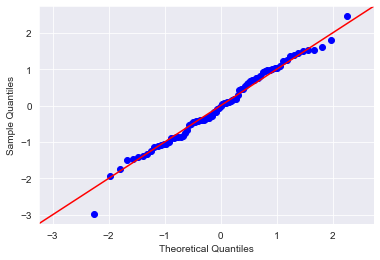

In [383]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

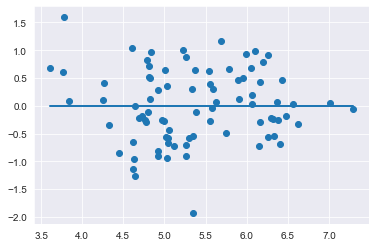

In [384]:
# Check the Homoscedasticity Assumption

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [385]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     37.10
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           4.59e-15
Time:                        14:24:52   Log-Likelihood:                -81.976
No. Observations:                  83   AIC:                             172.0
Df Residuals:                      79   BIC:                             181.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.9060      1.264      7.048      0.000       6.391      11.421
Life_Freedom          5.5551      0.676      8.222      0.000       4.210       6.900
Govt_Conf            -3.4179      0.435     -7.860      0.000      -4.283      -2.552
Percep_Corruption   -11.8233      2.615     -4.521      0.000     -17.029      -6.618
==============================================================================
Omnibus:                        0.183   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.278
Skew:                          -0.106   Prob(JB):                        0.870
Kurtosis:                       2.811   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""